In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

%matplotlib inline

In [5]:
df_train = pd.read_csv('../Data/cleaned_train.csv')
df_test = pd.read_csv('../Data/cleaned_test.csv')

In [6]:
df_train.drop(columns='Unnamed: 0', inplace=True)

In [7]:
df_test.drop(columns='Unnamed: 0', inplace=True)

In [8]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,Normal,13517,Pave,NaN,IR1,Lvl,...,0,0,No Pool,No Fence,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,No Pool,No Fence,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,No Pool,No Fence,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,No Pool,No Fence,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,No Pool,No Fence,None,0,3,2010,WD,138500


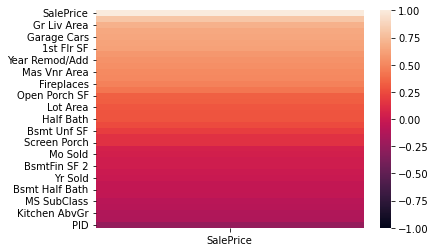

In [9]:
sns.heatmap(df_train.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), vmin = -1, vmax = 1);

In [10]:
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [11]:
numerical_cols = df_train.dtypes[df_train.dtypes != 'object'].index
numerical_cols


Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'SalePrice'],
      dtype='object')

In [12]:
is_nulls = df_train.isnull().sum()
not_null_cols = is_nulls[is_nulls == 0].index
not_null_cols

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence',


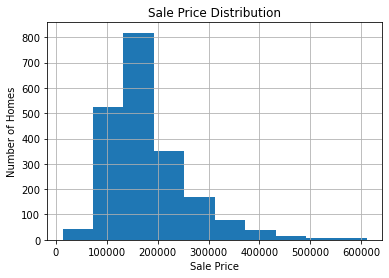

In [14]:
df_train['SalePrice'].hist()
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Number of Homes');

In [15]:
X = df_train[['Gr Liv Area','Overall Qual']]

In [16]:
y = df_train['SalePrice']

In [17]:
lr = LinearRegression()

In [18]:
X.shape

(2051, 2)

In [19]:
y.shape

(2051,)

In [20]:
lr.fit(X,y)

LinearRegression()

In [21]:
lr.coef_

array([   56.82259957, 33169.16501899])

In [22]:
lr.intercept_

-106460.72550225205

In [25]:
pred = lr.predict(X)
pred

array([176594.88937657, 246300.98591943, 119446.5873388 , ...,
       201255.89759019,  94403.05405839, 228231.39925599])

In [26]:
residuals = y - pred

In [27]:
sse = (residuals ** 2).sum()

In [28]:
mse = sse * 1/len(y)

In [29]:
mse

1709631680.011969

In [30]:
null_sse = ((y - y.mean()) ** 2).sum()
null_mse = null_sse * 1 / len(y)

In [31]:
null_mse

6278872217.837828

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#train test split
#fit model to train
#give all 3 scores (including r2)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [34]:
cross_val_score(lr, X_train, y_train).mean()

0.7108316477991972

In [35]:
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
lr.score(X_train, y_train)

0.7194163570829553

In [37]:
lr.score(X_test, y_test)

0.7530182162122661

In [38]:
r2_score(y, pred)

0.7277167585677206

In [42]:
X_kaggle = df_test[['Gr Liv Area','Overall Qual']] #use to get pred

In [43]:
sale_pred = lr.predict(X_kaggle)
sale_pred

array([201426.86213787, 170465.08545994, 210482.099715  , 114778.99751665,
       171660.72503906,  88555.27636943,  88611.0181992 , 131501.54644857,
       220738.59639324, 165250.41461516, 161794.42116923, 151928.1172994 ,
       170601.63027337, 282444.80195201, 195796.93733079, 135514.95819223,
       174001.88188953, 120631.88964282, 192786.87852305, 257330.29787825,
       119907.24585577, 108981.84722025, 184091.15307845, 149029.5421512 ,
       194985.87103809, 108981.84722025, 124564.49840282, 158369.10839918,
       152708.50291622,  31896.51616611,  75511.68820253,  95021.3286231 ,
       274250.75297538, 126484.78176899, 210259.1323959 , 208363.91018362,
       120049.41019121,  83315.54437076, 111545.97138981, 202789.72720631,
       162184.61397764, 232221.41332649, 134790.31440518, 136797.02027701,
       210760.80886386, 102602.21747224, 226647.23034918, 114611.77202733,
       112995.25896391, 118792.40926031, 130386.70985311, 286650.50033888,
       250251.08549707, 1

In [44]:
df_test['SalePrice'] = sale_pred

In [45]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,No Pool,No Fence,None,0,4,2006,WD,201426.862138
1,2718,905108090,90,RL,69.0,9662,Pave,No alley access,IR1,Lvl,...,0,0,No Pool,No Fence,None,0,8,2006,WD,170465.085460
2,2414,528218130,60,RL,58.0,17104,Pave,No alley access,IR1,Lvl,...,0,0,No Pool,No Fence,None,0,9,2006,New,210482.099715
3,1989,902207150,30,RM,60.0,8520,Pave,No alley access,Reg,Lvl,...,0,0,No Pool,No Fence,None,0,7,2007,WD,114778.997517
4,625,535105100,20,RL,60.0,9500,Pave,No alley access,IR1,Lvl,...,185,0,No Pool,No Fence,None,0,7,2009,WD,171660.725039


In [46]:
lr_submission = df_test[['Id', 'SalePrice']]

In [47]:
lr_submission.head()

,Id,SalePrice
0,2658,201426.862138
1,2718,170465.085460
2,2414,210482.099715
3,1989,114778.997517
4,625,171660.725039


In [48]:
lr_submission.set_index('Id', inplace = True)

In [49]:
lr_submission.head()

,SalePrice
Id,
2658,201426.862138
2718,170465.085460
2414,210482.099715
1989,114778.997517
625,171660.725039


In [50]:
lr_submission.to_csv('o_qual_lvng_area.csv')